## Analyzing WSJ Dataset

In [14]:
#importing packages
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
#plot graphs with 538 styling
style.use('fivethirtyeight')

In [15]:
#importing data
degree_df = pd.read_csv('degrees-that-pay-back.csv')

degree_df = degree_df.set_index('Undergraduate Major')


In [16]:
degree_df.head()

,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
Undergraduate Major,,,,,,,
Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [17]:
degree_df.dtypes

Starting Median Salary                                object
Mid-Career Median Salary                              object
Percent change from Starting to Mid-Career Salary    float64
Mid-Career 10th Percentile Salary                     object
Mid-Career 25th Percentile Salary                     object
Mid-Career 75th Percentile Salary                     object
Mid-Career 90th Percentile Salary                     object
dtype: object

In [18]:
#Note how all columns except 'Percent Change from Starting...' are object type
#Lets convert them to float

#converting all columns except percent change from starting to mid career salary to float
degree_df[degree_df.columns[0:2]] = degree_df[degree_df.columns[0:2]].replace('[\$,]', '', regex=True).astype(float)
degree_df[degree_df.columns[3:]] = degree_df[degree_df.columns[3:]].replace('[\$,]', '', regex=True).astype(float)


In [19]:
#Let's also change the order of the columns so Mid-Career Median Salary is in between the 25th and 75th percentiles
#change order of columns
col = degree_df.columns.tolist()
col = col[0:1] + col[2:5] + col[1:2] + col[5:]
degree_df = degree_df[col]

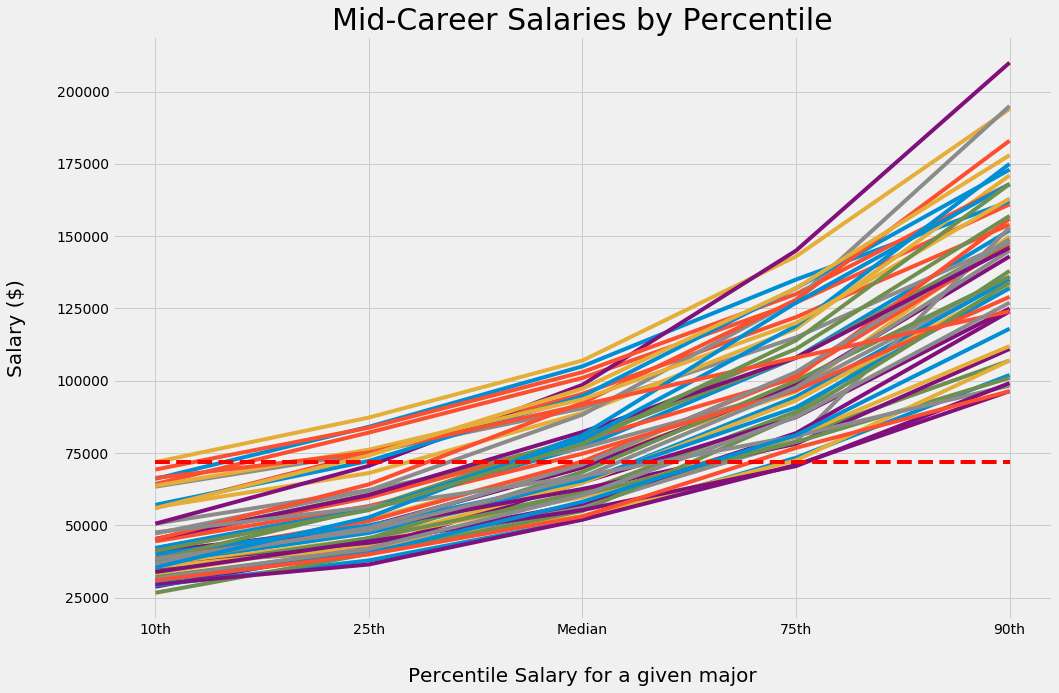

In [47]:
fig,ax = plt.subplots(figsize=(15,10))

for idx,row in degree_df.iterrows():
    x = list(range(len(row.index[2:])))
    y = list(row[2:])
    plt.plot(x,y,label=idx)
labels = ['10th','25th','Median','75th','90th']
plt.xticks(list(range(len(degree_df.columns[2:]))),labels)
plt.xlabel('Percentile Salary for a given major',size=20)
plt.ylabel('Salary ($)',size=20)
ax.set_title('Mid-Career Salaries by Percentile',size=30)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 30
#plt.savefig('WSJ Analysis.png')



In [40]:
#For comparison purposes, lets find the median of the Mid-Career Median Salary
Median = degree_df['Mid-Career Median Salary'].median()
print(Median)

72000.0


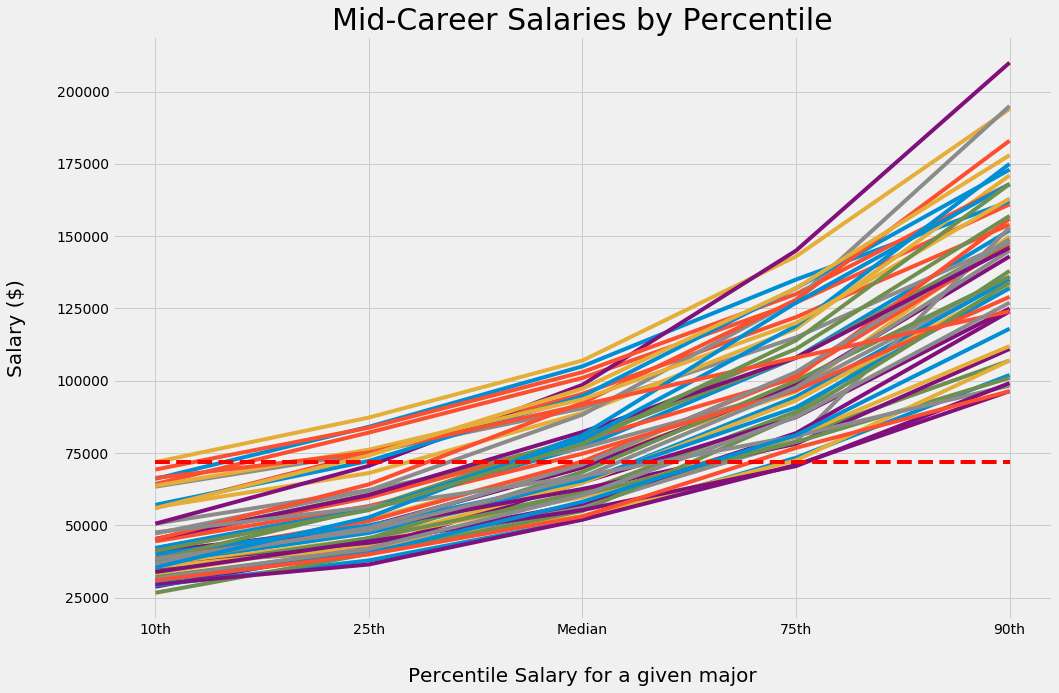

In [48]:
fig,ax = plt.subplots(figsize=(15,10))

for idx,row in degree_df.iterrows():
    x = list(range(len(row.index[2:])))
    y = list(row[2:])
    plt.plot(x,y,label=idx)
labels = ['10th','25th','Median','75th','90th']
plt.plot(list(range(len(degree_df.columns[2:]))),[Median]*len(degree_df.columns[2:]),'r--',label='Median Salary of Median Mid-Career Salaries')
plt.xticks(list(range(len(degree_df.columns[2:]))),labels)
plt.xlabel('Percentile Salary for a given major',size=20)
plt.ylabel('Salary ($)',size=20)
ax.set_title('Mid-Career Salaries by Percentile',size=30)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 30
#plt.savefig('WSJ Analysis.png')